In [11]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.features import GeoJsonTooltip
import matplotlib.patches as mpatches

os.chdir("/Users/adriensorin/Desktop/Documents ENSAE/2A/Python/Données/CSP")

In [4]:
csp_communes = pd.read_csv("./cspcommunes.csv")


/Users/adriensorin/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
#pd.set_option('display.max_columns', None)  #pour afficher toutes les colonnes
#pd.reset_option('display.max_rows')
csp_communes

,dep,nomdep,codecommune,nomcommune,agri1962,indp1962,cadr1962,pint1962,empl1962,ouvr1962,...,perchom1950,perchom1951,perchom1952,perchom1953,perchom1954,perchom1955,perchom1956,perchom1957,perchom1958,perchom1959
0,1,AIN,1001,ABERGEMENT-CLEMENCIAT,103.0,4.0,0.0,1.0,12.0,37.0,...,0.036952,0.036952,0.036952,0.036952,0.036952,0.036952,0.036952,0.036952,0.036952,0.036952
1,1,AIN,1002,ABERGEMENT-DE-VAREY,36.0,0.0,0.0,1.0,1.0,6.0,...,0.066204,0.066204,0.066204,0.066204,0.066204,0.066204,0.066204,0.066204,0.066204,0.066204
2,1,AIN,1003,AMAREINS,22.0,1.0,0.0,1.0,1.0,10.0,...,0.207861,0.207861,0.207861,0.207861,0.207861,0.207861,0.207861,0.207861,0.207861,0.207861
3,1,AIN,1004,AMBERIEU-EN-BUGEY,34.0,243.0,40.0,172.0,462.0,853.0,...,0.470220,0.470220,0.470220,0.470220,0.470220,0.470220,0.470220,0.470220,0.470220,0.470220
4,1,AIN,1005,AMBERIEUX-EN-DOMBES,65.0,45.0,0.0,5.0,16.0,60.0,...,0.384620,0.384620,0.384620,0.384620,0.384620,0.384620,0.384620,0.384620,0.384620,0.384620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37980,95,VAL-D'OISE,95676,VILLERS-EN-ARTHIES,7.0,8.0,0.0,1.0,8.0,26.0,...,0.241007,0.241007,0.241007,0.241007,0.241007,0.241007,0.241007,0.241007,0.241007,0.241007
37981,95,VAL-D'OISE,95678,VILLIERS-ADAM,14.0,10.0,3.0,6.0,32.0,53.0,...,0.045288,0.045288,0.045288,0.045288,0.045288,0.045288,0.045288,0.045288,0.045288,0.045288
37982,95,VAL-D'OISE,95680,VILLIERS-LE-BEL,12.0,192.0,147.0,499.0,1042.0,1658.0,...,0.914509,0.914509,0.914509,0.914509,0.914509,0.914509,0.914509,0.914509,0.914509,0.914509
37983,95,VAL-D'OISE,95682,VILLIERS-LE-SEC,3.0,3.0,1.0,3.0,5.0,47.0,...,0.101692,0.101692,0.101692,0.101692,0.101692,0.101692,0.101692,0.101692,0.101692,0.101692


In [5]:
# On met tous les codes communes à 5 chiffres, et on sélectionne uniquement celles du Finistère (département 29)
csp_communes['codecommune'] = csp_communes['codecommune'].astype(str).str.zfill(5)
csp_communes_finistere = csp_communes[csp_communes['nomdep'] == 'FINISTERE']
csp_communes_finistere

,dep,nomdep,codecommune,nomcommune,agri1962,indp1962,cadr1962,pint1962,empl1962,ouvr1962,...,perchom1950,perchom1951,perchom1952,perchom1953,perchom1954,perchom1955,perchom1956,perchom1957,perchom1958,perchom1959
11301,29,FINISTERE,29001,ARGOL,284.0,24.0,0.0,5.0,18.0,33.0,...,0.079373,0.079373,0.079373,0.079373,0.079373,0.079373,0.079373,0.079373,0.079373,0.079373
11302,29,FINISTERE,29002,ARZANO,346.0,35.0,1.0,5.0,24.0,67.0,...,0.176127,0.176127,0.176127,0.176127,0.176127,0.176127,0.176127,0.176127,0.176127,0.176127
11303,29,FINISTERE,29003,AUDIERNE,22.0,179.0,13.0,69.0,143.0,298.0,...,0.347761,0.347761,0.347761,0.347761,0.347761,0.347761,0.347761,0.347761,0.347761,0.347761
11304,29,FINISTERE,29004,BANNALEC,723.0,192.0,6.0,51.0,105.0,541.0,...,0.296871,0.296871,0.296871,0.296871,0.296871,0.296871,0.296871,0.296871,0.296871,0.296871
11305,29,FINISTERE,29005,BAYE,59.0,14.0,0.0,3.0,7.0,45.0,...,0.994940,0.994940,0.994940,0.994940,0.994940,0.994940,0.994940,0.994940,0.994940,0.994940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11584,29,FINISTERE,29298,TREOGAT,132.0,25.0,1.0,3.0,10.0,36.0,...,0.147250,0.147250,0.147250,0.147250,0.147250,0.147250,0.147250,0.147250,0.147250,0.147250
11585,29,FINISTERE,29299,TREOUERGAT,79.0,3.0,0.0,1.0,3.0,10.0,...,0.191063,0.191063,0.191063,0.191063,0.191063,0.191063,0.191063,0.191063,0.191063,0.191063
11586,29,FINISTERE,29300,TREVOUX,162.0,43.0,1.0,8.0,23.0,98.0,...,0.055111,0.055111,0.055111,0.055111,0.055111,0.055111,0.055111,0.055111,0.055111,0.055111
11587,29,FINISTERE,29301,TREZILIDE,92.0,6.0,0.0,3.0,1.0,14.0,...,0.329708,0.329708,0.329708,0.329708,0.329708,0.329708,0.329708,0.329708,0.329708,0.329708


In [6]:
csp_communes_suffix = csp_communes_finistere.filter(regex="2022$")  #on étudie pour l'instant en 2022, on ne garde que les variables de 2022
csp_communes_2022 = csp_communes_finistere[["dep", "nomdep", "codecommune", "nomcommune"]].join(csp_communes_suffix)

In [22]:
csp_communes_2022

,dep,nomdep,codecommune,nomcommune,agri2022,indp2022,cadr2022,pint2022,empl2022,ouvr2022,...,perindp2022,percadr2022,perpint2022,perempl2022,perouvr2022,perchom2022,peraind2022,peraica2022,perouem2022,percapi2022
11301,29,FINISTERE,29001,ARGOL,27,9,40,35,77,125,...,0.147379,0.393061,0.048871,0.367382,0.950390,0.711179,0.822415,0.508795,0.881728,0.084603
11302,29,FINISTERE,29002,ARZANO,0,0,67,48,168,49,...,0.024479,0.632846,0.069999,0.985166,0.351062,0.272798,0.026546,0.357135,0.891646,0.255394
11303,29,FINISTERE,29003,AUDIERNE,51,189,122,306,442,363,...,0.907923,0.225859,0.196388,0.626799,0.709147,0.470097,0.909931,0.518781,0.693821,0.152560
11304,29,FINISTERE,29004,BANNALEC,47,110,169,673,444,524,...,0.509299,0.237311,0.866998,0.293443,0.758483,0.452870,0.661526,0.223491,0.544394,0.455081
11305,29,FINISTERE,29005,BAYE,6,19,0,112,31,162,...,0.531503,0.020717,0.859988,0.036207,0.981968,0.983524,0.639114,0.040585,0.778933,0.242243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11584,29,FINISTERE,29298,TREOGAT,0,0,17,41,86,37,...,0.009339,0.263022,0.268082,0.978004,0.577628,0.024962,0.001057,0.061769,0.924513,0.207294
11585,29,FINISTERE,29299,TREOUERGAT,0,11,0,37,45,72,...,0.644493,0.006468,0.255899,0.480640,0.967436,0.078149,0.569124,0.033627,0.950687,0.071672
11586,29,FINISTERE,29300,TREVOUX,33,82,0,287,153,134,...,0.890440,0.049487,0.952623,0.280772,0.544205,0.233148,0.914037,0.227165,0.347726,0.428177
11587,29,FINISTERE,29301,TREZILIDE,12,39,6,39,23,22,...,0.990009,0.108901,0.609304,0.110683,0.381803,0.080656,0.987979,0.848324,0.172694,0.206052


In [7]:
# La liste des CSP est :
# agriculteurs
# indépendants (artisants, commerçants, chefs d'entreprise)
# cadres et professions intellectuelles supérieures 
# professions intermédiaires
# employés
# ouvriers


# On prend le geojson des communes du Finistère
communes_29 = gpd.read_file("/Users/adriensorin/Desktop/Documents ENSAE/2A/Python/Données/communes_29.geojson")

In [8]:
carte_csp_communes_2022 = pd.merge(communes_29, csp_communes_2022, left_on = 'code', right_on = 'codecommune',how='left')


In [9]:
# On rajoute une colonne avec la CSP majoritaire de chaque commune
csp = ['agri2022', 'indp2022', 'cadr2022', 'pint2022', 'empl2022', 'ouvr2022']
carte_csp_communes_2022['CSP_majoritaire'] = carte_csp_communes_2022[csp].idxmax(axis=1)


In [47]:
# On centre sur le Finistère
carte = folium.Map(location=[48.3, -4.5], zoom_start=9)



# On change les noms pour que ça soit plus lisible 
csp_noms = {
    'agri2022': 'Agriculteurs',
    'indp2022': 'Indépendants',
    'cadr2022': 'Cadres',
    'pint2022': 'Professions intermédiaires',
    'empl2022': 'Employés',
    'ouvr2022': 'Ouvriers'
}
carte_csp_communes_2022['CSP_majoritaire_nom'] = carte_csp_communes_2022['CSP_majoritaire'].map(csp_noms)


# Couleur pour chaque CSP
csp_colors = {
    'Agriculteurs': 'blue',
    'Indépendants': 'green',
    'Cadres': 'orange',
    'Professions intermédiaires': 'purple',
    'Employés': 'yellow',
    'Ouvriers': 'red'
}

# Fonction pour attribuer la couleur selon la CSP majoritaire
def style_function(feature):
    csp = feature['properties']['CSP_majoritaire']
    return {
        'fillColor': csp_colors.get(csp, 'gray'),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.6,
    }

# Ajouter le GeoJSON à la carte
folium.GeoJson(
    carte_csp_communes_2022,
    style_function=style_function,
    tooltip=GeoJsonTooltip(
        fields=['nomcommune', 'CSP_majoritaire'],
        aliases=['Commune:', 'CSP majoritaire:'],
        localize=True
    )
).add_to(carte)

# Enregistrer la carte
carte.save("/Users/adriensorin/Desktop/Documents ENSAE/2A/Python/Graphiques/carte_csp_majoritaire.html")

In [ ]:
# Ce qu'on remarque : très majoritairement des ouvriers, employés et professions intermédiaires.
# Donc surtout des classes populaires et classes moyennes. 

/Users/adriensorin/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/Users/adriensorin/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


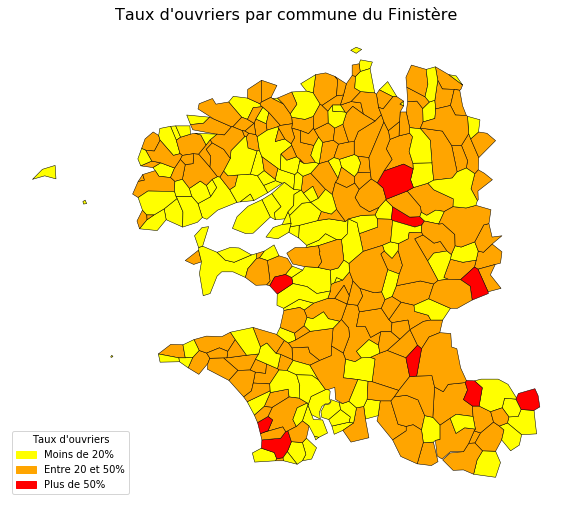

In [ ]:
carte_csp_communes_2022['categorie_taux_ouvriers'] = pd.cut(
    carte_csp_communes_2022['pouvr2022'],
    bins=[-1, 0.2, 0.5, 1],  # On met -1 pour inclure le cas où pouvr2022 = 0
    labels=['Moins de 20%', 'Entre 20 et 50%', 'Plus de 50%']
)


# Définir la taille de la figure
fig, ax = plt.subplots(1, 1, figsize=(10, 12))


couleurs = {'Moins de 20%':'yellow', 'Entre 20 et 50%':'orange', 'Plus de 50%':'red'}

# Tracer la carte
carte_csp_communes_2022.plot(column='categorie_taux_ouvriers',  # colonne à visualiser
              linewidth=0.5,          # contours des communes
              edgecolor='black',
              color=carte_csp_communes_2022['categorie_taux_ouvriers'].map(couleurs),
              legend=True,            # afficher la légende
              ax=ax)

# Ajouter un titre
ax.set_title("Taux d'ouvriers par commune du Finistère", fontsize=16)

# Créer les patches pour la légende
patches = [mpatches.Patch(color=couleurs[key], label=key) for key in couleurs]

# Ajouter la légende
ax.legend(handles=patches, title="Taux d'ouvriers", loc='lower left')

# Supprimer les axes
ax.set_axis_off()

# Afficher la carte
plt.show()

fig.savefig("/Users/adriensorin/Desktop/Documents ENSAE/2A/Python/Graphiques/taux_ouvriers_commune.png", dpi=300, bbox_inches='tight')


/Users/adriensorin/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/Users/adriensorin/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


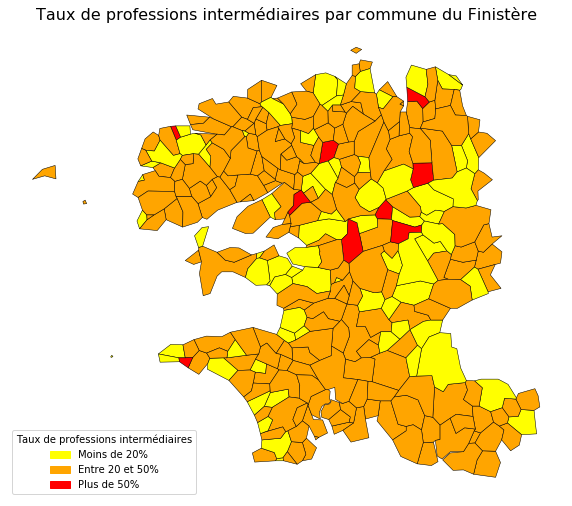

In [ ]:
carte_csp_communes_2022['categorie_taux_pint'] = pd.cut(
    carte_csp_communes_2022['ppint2022'],
    bins=[-1, 0.2, 0.5, 1],  # On met -1 pour inclure le cas où le taux vaut 0
    labels=['Moins de 20%', 'Entre 20 et 50%', 'Plus de 50%']
)


# Définir la taille de la figure
fig, ax = plt.subplots(1, 1, figsize=(10, 12))


couleurs = {'Moins de 20%':'yellow', 'Entre 20 et 50%':'orange', 'Plus de 50%':'red'}

# Tracer la carte
carte_csp_communes_2022.plot(column='categorie_taux_pint',  # colonne à visualiser
              linewidth=0.5,          # contours des communes
              edgecolor='black',
              color=carte_csp_communes_2022['categorie_taux_pint'].map(couleurs),
              legend=True,            # afficher la légende
              ax=ax)

# Ajouter un titre
ax.set_title("Taux de professions intermédiaires par commune du Finistère", fontsize=16)

# Créer les patches pour la légende
patches = [mpatches.Patch(color=couleurs[key], label=key) for key in couleurs]

# Ajouter la légende
ax.legend(handles=patches, title="Taux de professions intermédiaires", loc='lower left')

# Supprimer les axes
ax.set_axis_off()

# Afficher la carte
plt.show()

fig.savefig("/Users/adriensorin/Desktop/Documents ENSAE/2A/Python/Graphiques/taux_prof_inter_commune.png", dpi=300, bbox_inches='tight')


/Users/adriensorin/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/Users/adriensorin/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


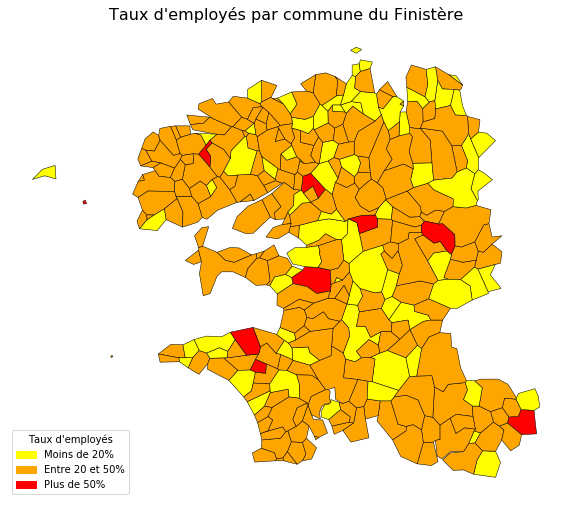

In [67]:
carte_csp_communes_2022['categorie_taux_empl'] = pd.cut(
    carte_csp_communes_2022['pempl2022'],
    bins=[-1, 0.2, 0.5, 1],  # On met -1 pour inclure le cas où le taux vaut 0
    labels=['Moins de 20%', 'Entre 20 et 50%', 'Plus de 50%']
)


# Définir la taille de la figure
fig, ax = plt.subplots(1, 1, figsize=(10, 12))


couleurs = {'Moins de 20%':'yellow', 'Entre 20 et 50%':'orange', 'Plus de 50%':'red'}

# Tracer la carte
carte_csp_communes_2022.plot(column='categorie_taux_empl',  # colonne à visualiser
              linewidth=0.5,          # contours des communes
              edgecolor='black',
              color=carte_csp_communes_2022['categorie_taux_empl'].map(couleurs),
              legend=True,            # afficher la légende
              ax=ax)

# Ajouter un titre
ax.set_title("Taux d'employés par commune du Finistère", fontsize=16)

# Créer les patches pour la légende
patches = [mpatches.Patch(color=couleurs[key], label=key) for key in couleurs]

# Ajouter la légende
ax.legend(handles=patches, title="Taux d'employés", loc='lower left')

# Supprimer les axes
ax.set_axis_off()

# Afficher la carte
plt.show()

fig.savefig("/Users/adriensorin/Desktop/Documents ENSAE/2A/Python/Graphiques/taux_employes_commune.png", dpi=300, bbox_inches='tight')


/Users/adriensorin/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/Users/adriensorin/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


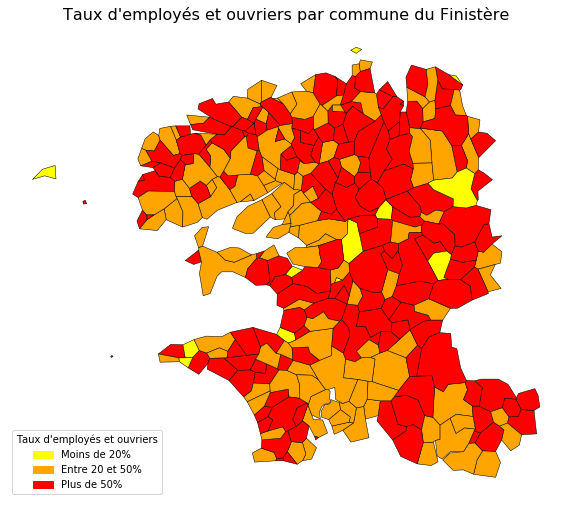

In [14]:
carte_csp_communes_2022['categorie_taux_ouvr_empl'] = pd.cut(
    carte_csp_communes_2022['pouem2022'],
    bins=[-1, 0.2, 0.5, 1],  # On met -1 pour inclure le cas où le taux vaut 0
    labels=['Moins de 20%', 'Entre 20 et 50%', 'Plus de 50%']
)


# Définir la taille de la figure
fig, ax = plt.subplots(1, 1, figsize=(10, 12))


couleurs = {'Moins de 20%':'yellow', 'Entre 20 et 50%':'orange', 'Plus de 50%':'red'}

# Tracer la carte
carte_csp_communes_2022.plot(column='categorie_taux_ouvr_empl',  # colonne à visualiser
              linewidth=0.5,          # contours des communes
              edgecolor='black',
              color=carte_csp_communes_2022['categorie_taux_ouvr_empl'].map(couleurs),
              legend=True,            # afficher la légende
              ax=ax)

# Ajouter un titre
ax.set_title("Taux d'employés et ouvriers par commune du Finistère", fontsize=16)

# Créer les patches pour la légende
patches = [mpatches.Patch(color=couleurs[key], label=key) for key in couleurs]

# Ajouter la légende
ax.legend(handles=patches, title="Taux d'employés et ouvriers", loc='lower left')

# Supprimer les axes
ax.set_axis_off()

# Afficher la carte
plt.show()

fig.savefig("/Users/adriensorin/Desktop/Documents ENSAE/2A/Python/Graphiques/taux_employes_ouvriers_commune.png", dpi=300, bbox_inches='tight')


In [ ]:
# On observe une très large majorité de catégories populaires. 
carte_csp_communes_2022[carte_csp_communes_2022['pouem2022'] >= 0.5].shape[0]
# Il y a 149 communes sur 277 (soit 54%) où les ouvriers et employés représentent 
# plus de 50% de la population active. 

149